In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Some appearance options.
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)
pd.set_option('display.max_rows', 21)

Populating the interactive namespace from numpy and matplotlib


# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
# Load the data, and print some of it.
data = pd.read_csv("kc_house_data2.csv", skipinitialspace=True)
display(data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

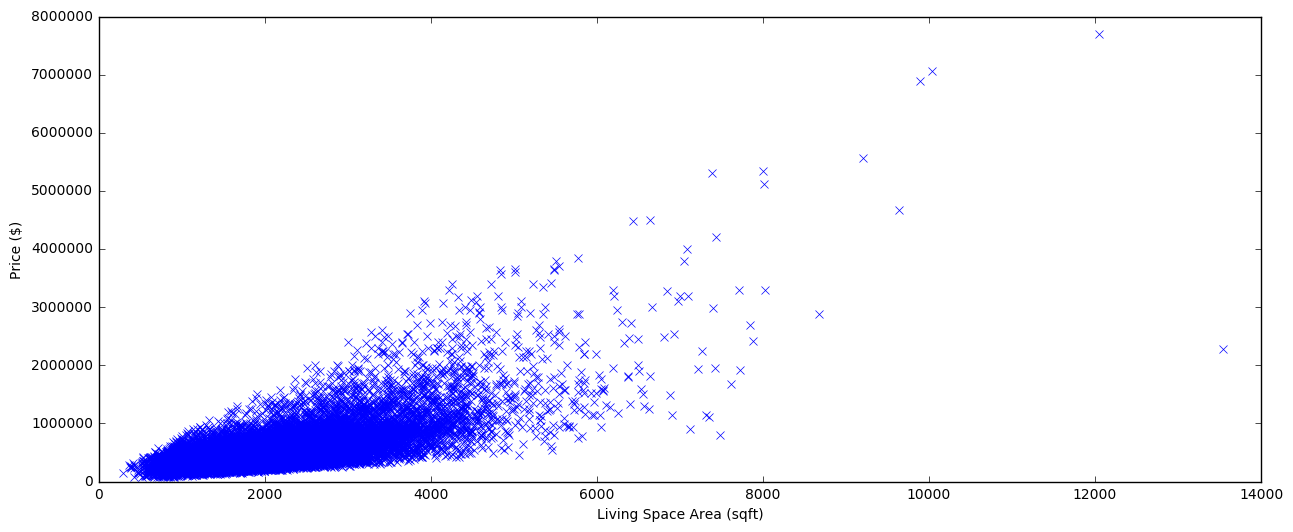

In [3]:
# Pull out the sqft_living and price columns from the data and plot them
plt.plot(data["sqft_living"], data["price"], 'x')
plt.xlabel("Living Space Area (sqft)")
plt.ylabel("Price ($)")
plt.show()

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed.

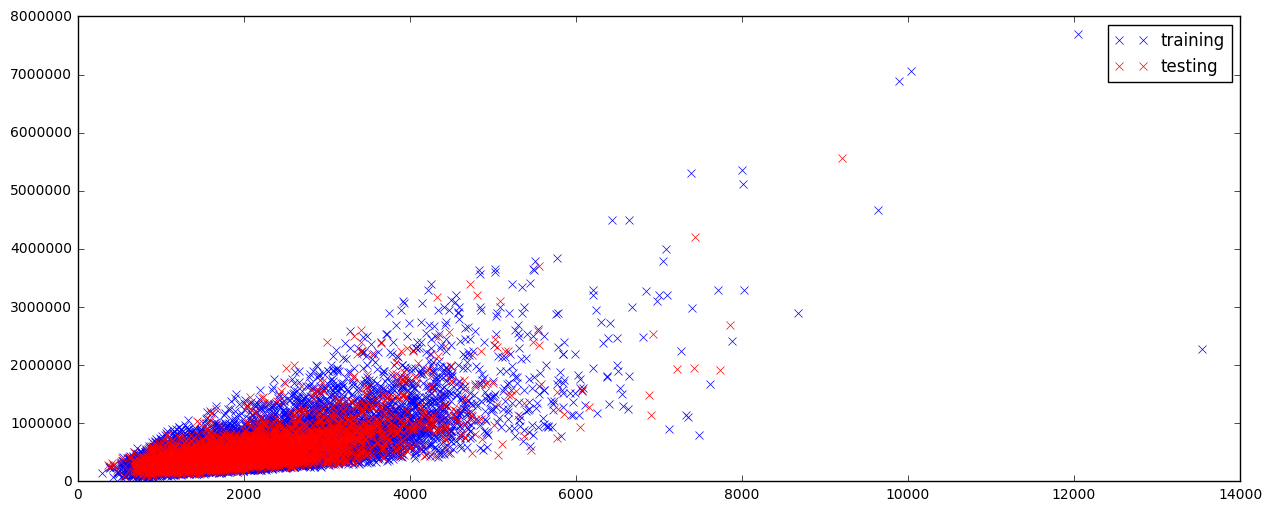

In [4]:
np.random.seed(0)

# Let N_test be 20% (or 1/5th) of the data, and use a random shuffle
# to partition the data.
N_rows = len(data)
N_test = N_rows//5
shuffled_row_indices = np.random.permutation(N_rows)
test_rows = shuffled_row_indices[:N_test]
train_rows = shuffled_row_indices[N_test:]

test_data = data.loc[test_rows,:]
train_data = data.loc[train_rows,:]

# Plot the training data in blue and the test data in red
plt.plot(train_data['sqft_living'], train_data["price"],'x', c='blue', label='training')
plt.plot(test_data["sqft_living"], test_data["price"], 'x', c='red', label='testing')
plt.legend()
plt.show()

## Build the regression model using only sqft_living as a feature

In [5]:
simple_model_formula = "price ~ sqft_living"
simple_model = smf.ols(formula=simple_model_formula, data=train_data)
simple_model_fit = simple_model.fit()

# Evaluate the simple model

In [6]:
print('Test data true mean price: $%.2f' % np.mean(test_data["price"]))
test_price_predicted = simple_model_fit.predict(test_data)
print('Test data predicted mean price: $%.2f' % np.mean(test_price_predicted))

Test data true mean price: $529328.85
Test data predicted mean price: $540775.80


In [7]:
err = test_data["price"] - test_price_predicted
err_rms = np.sqrt(np.mean(err ** 2))
print('RMSE from sqft of living space: $%.2f' % err_rms)

RMSE from sqft of living space: $249044.64


RMSE of about \$249k on houses with mean price of $540k! That's useless!

# Let's show what our predictions look like

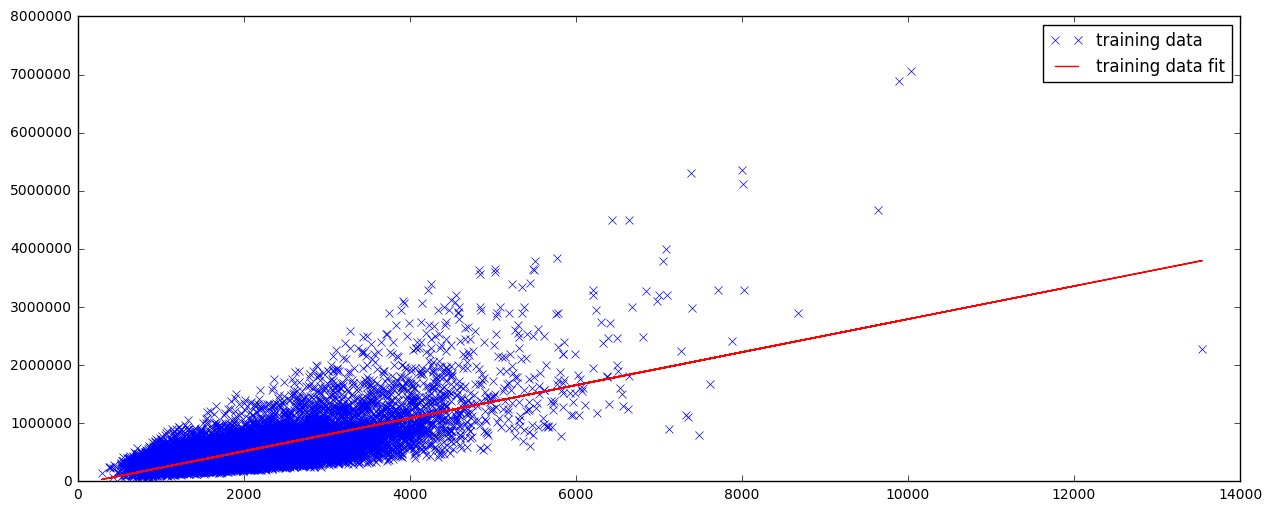

In [8]:
# Plot the training data in blue and the prediction line in green
plt.plot(train_data["sqft_living"],
         train_data["price"],
         'x', c='blue', label="training data")
plt.plot(train_data["sqft_living"],
         simple_model_fit.fittedvalues,
         c='red', label="training data fit")
plt.legend()
plt.show()

Above: blue dots are training data, red line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [9]:
simple_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.698e+04
Date:                Sun, 08 Jan 2017   Prob (F-statistic):               0.00
Time:                        18:53:46   Log-Likelihood:            -2.4044e+05
No. Observations:               17291   AIC:                         4.809e+05
Df Residuals:                   17289   BIC:                         4.809e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -4.852e+04   4964.828     -9.772      0.000     -5.82e+04 -3.88e+04
sqft_living   284.1430      2.180    130.312      0.000       279.869   288.417
==============================================================================
Omnibus:                    12059.119   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           469337.586
Skew:                           2.872   Prob(JB):                         0.00
Kurtosis:                      27.869   Cond. No.                     5.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The formula this produced is:

    house price = $284 * (square feet) - $48,520

# Explore other features in the data

To build a more elaborate model, we will explore using more features.

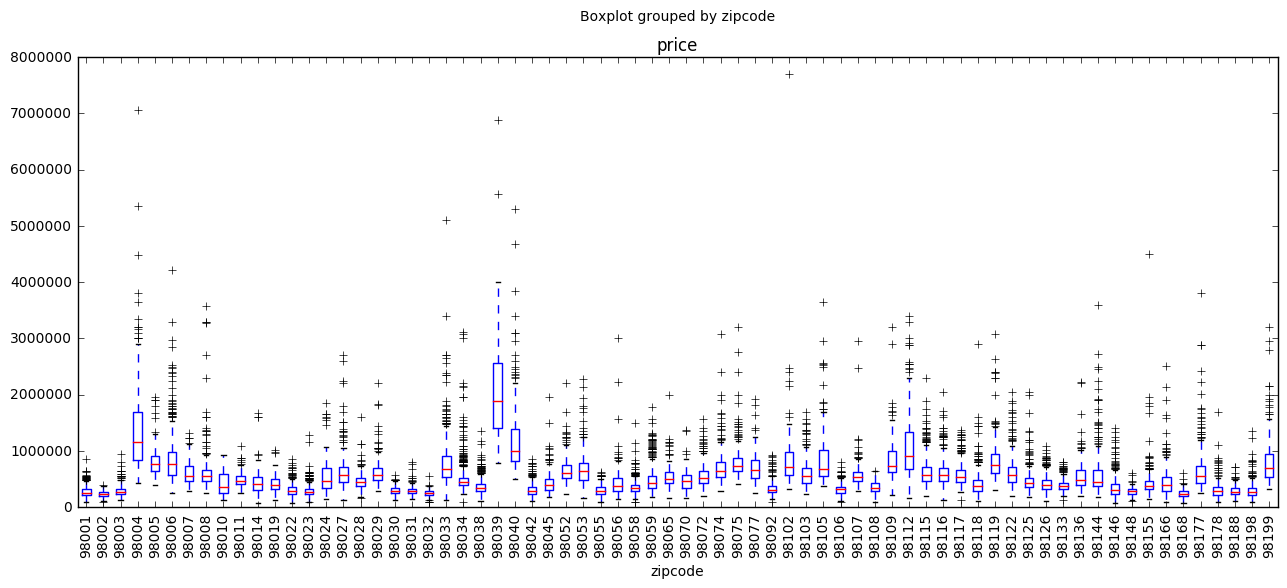

In [10]:
# Location is said to be important, so let's set zipcodes as categories,
# and draw a box plot for the split along those categories.
data["zipcode"] = data["zipcode"].astype("category")
data.boxplot(column="price", by="zipcode", rot=90, grid=False)

98039 is the most expensive zip code.

# Build a regression model with more features

In [11]:
# Create a model with usual linear features square feet of living space,
# lot space, number of bedrooms or bathrooms, and zipcode.
better_formula = "price ~ sqft_living + sqft_lot + " + \
                 "bedrooms + bathrooms + floors + C(zipcode)"
better_model = smf.ols(formula=better_formula, data=train_data)
better_model_fit = better_model.fit()

## Comparing the results of the simple model with adding more features

In [13]:
print('Test data true mean price: $%.2f' % np.mean(test_data["price"]))
test_data_price_predicted = better_model_fit.predict(test_data)
print('Test data predicted mean price: $%.2f' % np.mean(test_data_price_predicted))

err = test_data["price"] - test_data_price_predicted
err_rms = np.sqrt(np.mean(err ** 2))
print('RMSE from more complicated model: $%.2f' % err_rms)

Test data true mean price: $529328.85
Test data predicted mean price: $530722.95
RMSE from more complicated model: $171967.80


The RMSE goes down from \$249k to \$172k with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [14]:
example_house_1 = data.loc[test_rows[2],:]
print(type(example_house_1))
display(example_house_1)

<class 'pandas.core.series.Series'>


id                    2768000270
date             20140625T000000
price                     562100
bedrooms                       2
bathrooms                   0.75
sqft_living                 1440
sqft_lot                    3700
floors                         1
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  1200
sqft_basement                240
yr_built                    1914
yr_renovated                   0
zipcode                    98107
lat                      47.6707
long                    -122.364
sqft_living15               1440
sqft_lot15                  4300
Name: 2680, dtype: object

<img src="https://www.djc.com/stories/images/20140227/RainWise_big.jpg">

In [15]:
print('Price predicted by full feature model: $%.2f' %
      better_model_fit.predict(example_house_1))
print('Actual price: $%.2f' % example_house_1.loc["price"])

Price predicted by full feature model: $584327.50
Actual price: $562100.00


In [17]:
print('Price predicted by just sqft_living: $%.2f' %
      simple_model_fit.predict(example_house_1))

Price predicted by just sqft_living: $360648.22


In this case, the model including more than just square feet produces a very accurate estimate, while the model using just square feet is inaccurate.

## Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [18]:
example_house_2 = data.loc[282,:]
display(example_house_2)

id                    7424700045
date             20150513T000000
price                   2.05e+06
bedrooms                       5
bathrooms                      3
sqft_living                 3830
sqft_lot                    8480
floors                         2
waterfront                     0
view                           1
condition                      5
grade                          9
sqft_above                  2630
sqft_basement               1200
yr_built                    1905
yr_renovated                1994
zipcode                    98122
lat                      47.6166
long                    -122.287
sqft_living15               3050
sqft_lot15                  7556
Name: 282, dtype: object

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [20]:
print('Price predicted by full feature model: $%.2f' %
      better_model_fit.predict(example_house_2))
print('Price predicted by just sqft_living: $%.2f' %
      simple_model_fit.predict(example_house_2))
print('Actual price: $%.2f' % example_house_2.loc["price"])

Price predicted by full feature model: $1127200.61
Price predicted by just sqft_living: $1039749.91
Actual price: $2050000.00


In this case, neither model managed to produce an accurate result.

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [21]:
bill_gates = {'bedrooms':8, 
              'bathrooms':25, 
              'sqft_living':50000, 
              'sqft_lot':225000,
              'floors':4, 
              'zipcode':98039, 
              'condition':10, 
              'grade':10,
              'waterfront':1,
              'view':4,
              'sqft_above':37500,
              'sqft_basement':12500,
              'yr_built':1994,
              'yr_renovated':2010,
              'lat':47.627606,
              'long':-122.242054,
              'sqft_living15':5000,
              'sqft_lot15':40000}
bill_gates = pd.Series(bill_gates)
display(bill_gates)

bathrooms            25.000000
bedrooms              8.000000
condition            10.000000
floors                4.000000
grade                10.000000
lat                  47.627606
long               -122.242054
sqft_above        37500.000000
sqft_basement     12500.000000
sqft_living       50000.000000
sqft_living15      5000.000000
sqft_lot         225000.000000
sqft_lot15        40000.000000
view                  4.000000
waterfront            1.000000
yr_built           1994.000000
yr_renovated       2010.000000
zipcode           98039.000000
dtype: float64

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [11]:
print('Price predicted by full feature model: $%.2f' %
      better_model_fit.predict(bill_gates))

NameError: name 'better_model_fit' is not defined

The model predicts a price of $15M for this house ... which is probably a bit low.